## Importing relevant packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

/Users/Rachit/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## Defining functions for graphs

In [2]:
def boxplot(col):
    fig, ax = plt.subplots()
    sns.boxplot(df1[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
    plt.show()


def ts_plot_2(y1, label1, y2, label2, xlabel, ylabel, title):
    fig, ax = plt.subplots( figsize=(10,5))
    ax.plot(y1, label=label1)
    ax.plot(y2, label=label2)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    ax.legend()

    plt.grid()
    plt.show()


def ts_plot(y1, label1, xlabel, ylabel, title):
    fig, ax = plt.subplots( figsize=(10,5))
    ax.plot(y1, label=label1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    ax.legend()
    
    plt.grid()
    plt.show()


def create_ts(col):
    temp_df = df1.groupby('visit_dt')[col].sum('acct_id')
    temp_df_month = temp_df.resample('M').sum()
    ts_plot(y1=temp_df_month, label1=col,
           xlabel="Date", ylabel="Count", title=f'Time series plot of {col}')



## Loading Data

In [3]:
df = pd.read_csv("Web Analytics Data e-learning.csv", header=0, thousands=",")

##  Data Overview

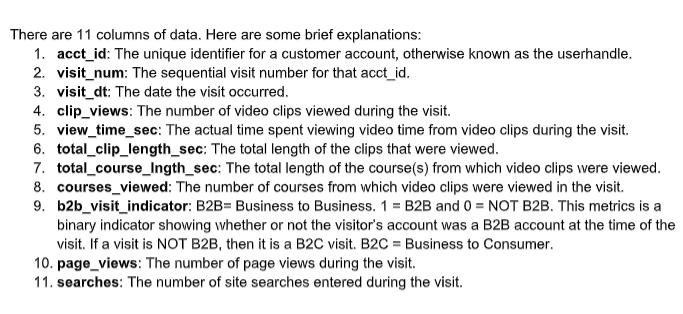

In [4]:
# Data header
df.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,1261.0,1.0,12/3/18,18.0,2373.0,2563.0,173376.0,1.0,0.0,6.0,5.0
1,1261.0,2.0,13/3/18,15.0,2453.0,2765.0,115584.0,1.0,0.0,1.0,5.0
2,1261.0,3.0,14/3/18,22.0,3296.0,4627.0,86688.0,1.0,0.0,2.0,5.0
3,1261.0,4.0,15/3/18,45.0,6337.0,7121.0,173376.0,1.0,0.0,2.0,3.0
4,1261.0,5.0,16/3/18,27.0,4393.0,4968.0,260064.0,1.0,0.0,4.0,0.0


In [5]:
# Data dimensions
df.shape

(13754, 11)

In [6]:
# Data types
df.dtypes

acct_id                   float64
visit_num                 float64
visit_dt                   object
clip_views                float64
view_time_sec             float64
total_clip_length_sec     float64
total_course_lngth_sec    float64
courses_viewed            float64
b2b_visit_indicator       float64
page_views                float64
searches                  float64
dtype: object

In [7]:
# Converting visit date to pandas datetime format
df.visit_dt = pd.to_datetime(df.visit_dt)

In [8]:
#Data Summaries
df.describe()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
count,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,1.364400e+04,13644.000000,13644.000000,13644.000000,13644.000000
mean,1716.179420,21.128042,21.432498,4026.209469,5324.848798,2.505053e+05,1.483949,0.516931,4.298373,1.888156
std,286.854475,23.935015,24.241938,3848.833272,5976.236783,4.109100e+05,1.103707,0.499732,3.178949,2.442407
min,1200.000000,1.000000,1.000000,12.000000,12.000000,1.000000e+03,1.000000,0.000000,1.000000,0.000000
25%,1456.000000,5.000000,6.000000,1205.000000,1519.000000,4.450775e+04,1.000000,0.000000,2.000000,0.000000
50%,1716.000000,12.000000,15.000000,2974.500000,3819.000000,1.228560e+05,1.000000,1.000000,3.000000,1.000000
75%,1971.000000,29.000000,31.000000,5702.250000,7390.500000,2.955072e+05,2.000000,1.000000,6.000000,3.000000
max,2200.000000,153.000000,910.000000,40086.000000,208513.000000,1.206972e+07,22.000000,1.000000,19.000000,14.000000


In [9]:
# Checking for missing values
df.isnull().sum()

acct_id                   110
visit_num                 110
visit_dt                  110
clip_views                110
view_time_sec             110
total_clip_length_sec     110
total_course_lngth_sec    110
courses_viewed            110
b2b_visit_indicator       110
page_views                110
searches                  110
dtype: int64

In [10]:
# Removing Rows where all the data is Null
df1 = df.dropna(how='all')

In [11]:
# Check for Null values in new DataFrame
df1.isnull().sum().sum()

0

In [12]:
# Columns
df1.columns

Index(['acct_id', 'visit_num', 'visit_dt', 'clip_views', 'view_time_sec',
       'total_clip_length_sec', 'total_course_lngth_sec', 'courses_viewed',
       'b2b_visit_indicator', 'page_views', 'searches'],
      dtype='object')

#### Analysing each variable

In [13]:
# Unique Account IDs
z = len(df1.acct_id.unique())
print(f"There are {z} unique account IDs")

There are 1001 unique account IDs


In [14]:
# Range of Data
st = df1.visit_dt.describe(datetime_is_numeric=True)[2]
ed = df1.visit_dt.describe(datetime_is_numeric=True)[6]
print(f"Data ranges from {st} to {ed}")

Data ranges from 2017-01-07 00:00:00 to 2018-12-04 00:00:00


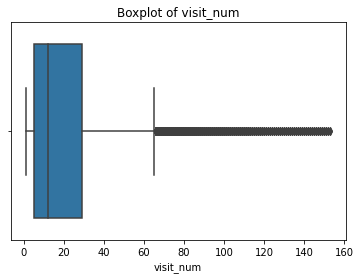

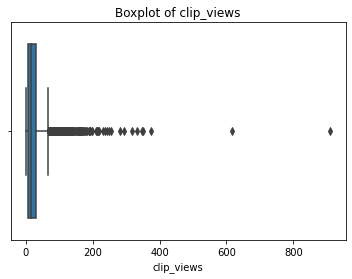

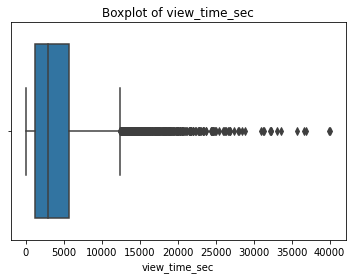

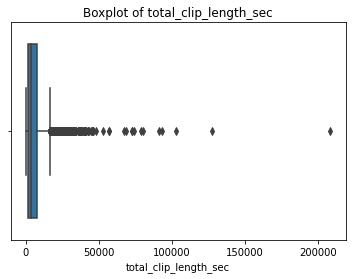

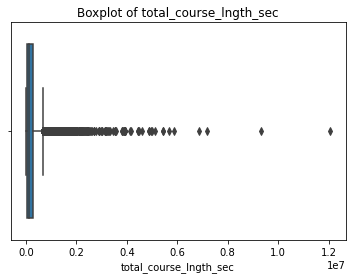

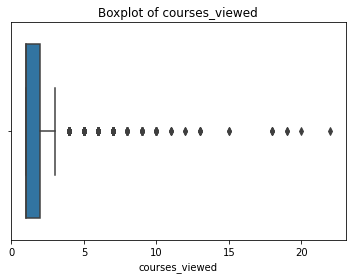

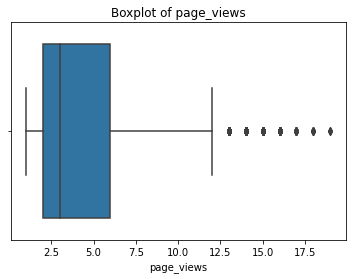

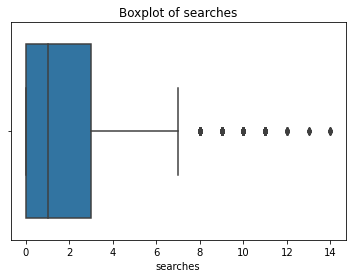

In [15]:
# Boxplots for numerical variables to overview the distribution of data
num_cols= ['visit_num', 'clip_views', 'view_time_sec', 'total_clip_length_sec',
           'total_course_lngth_sec','courses_viewed', 'page_views', 'searches']
for i in num_cols:
    boxplot(i)

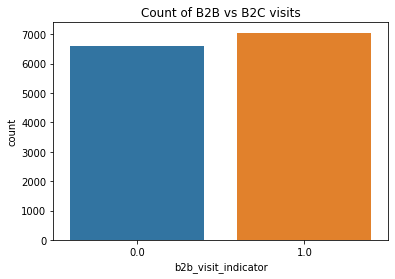

In [16]:
sns.countplot(df1.b2b_visit_indicator).set(title="Count of B2B vs B2C visits")
plt.show()

#### Correlation Heatmap

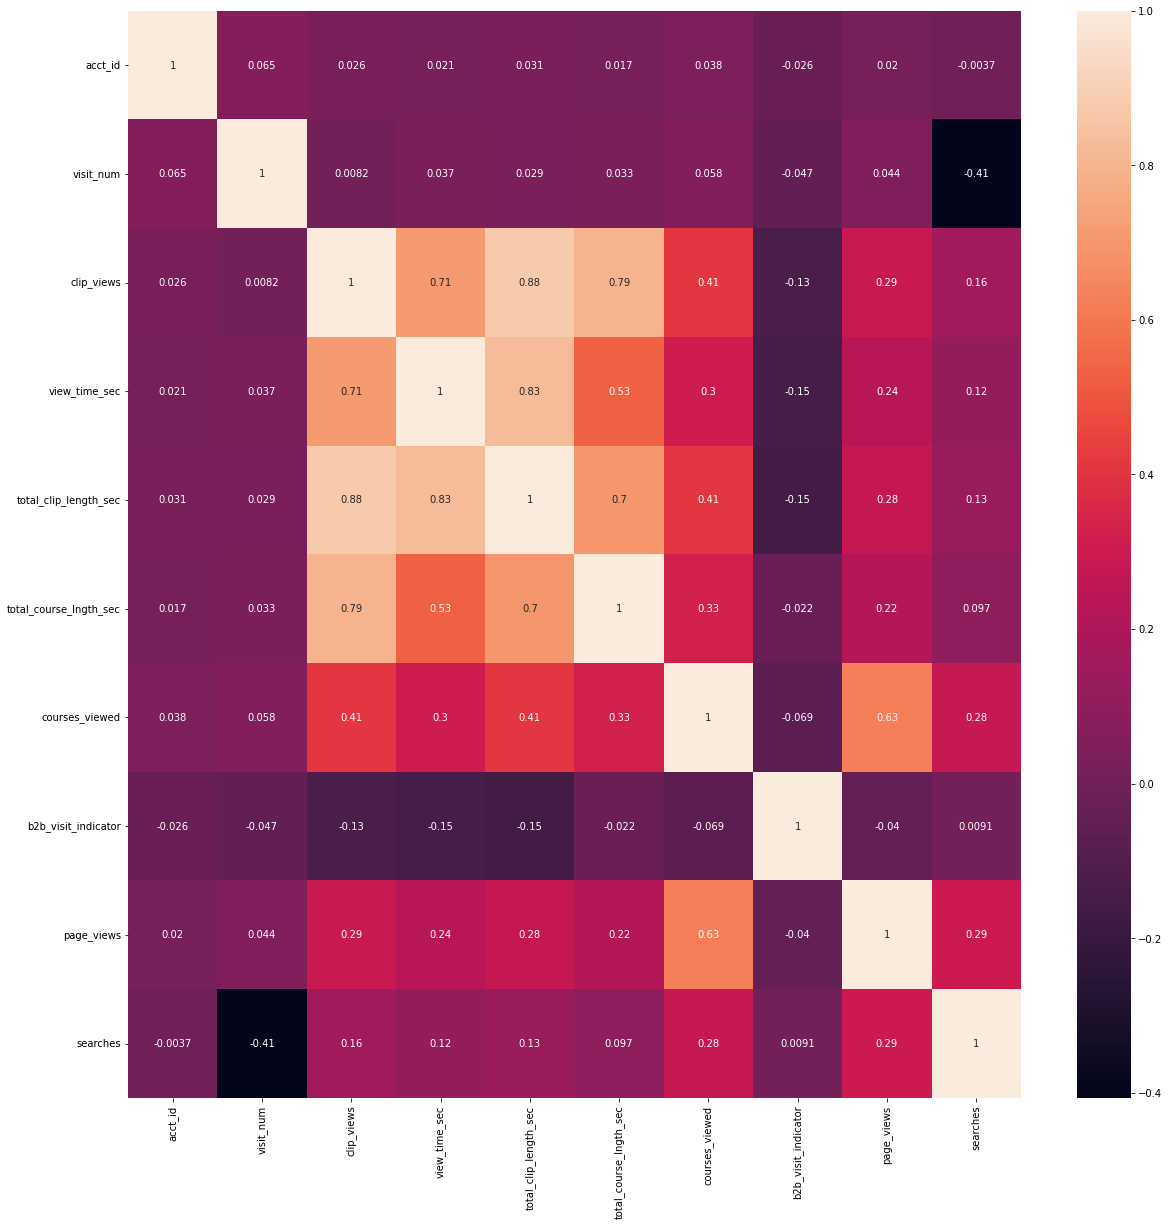

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

It can be observed that there is a high correlation between:
1. Clip Views and View Time Seconds
2. Clip Vews and total clip length in seconds
3. Clip Views and total course length in seconds
4. View time seconds and Total cllip length
5. Total course length and View Time in Seconds
6. Total Clip Length and total course length

Reccomendation: Collection of data about each video viewed and the length it was viewed for to get a better insight into learner interest for the content.

In [18]:
# New columns for further data analysis
df1['B2C'] = 1 - df1.b2b_visit_indicator
df1['B2B'] = df1.b2b_visit_indicator
df1['visits'] = 1

### Time Series Plots

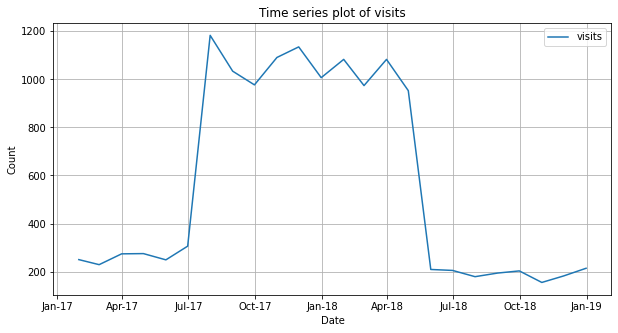

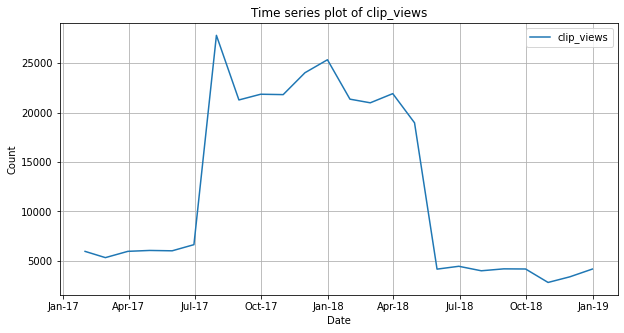

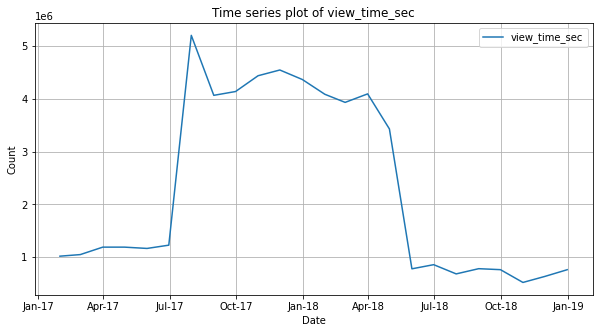

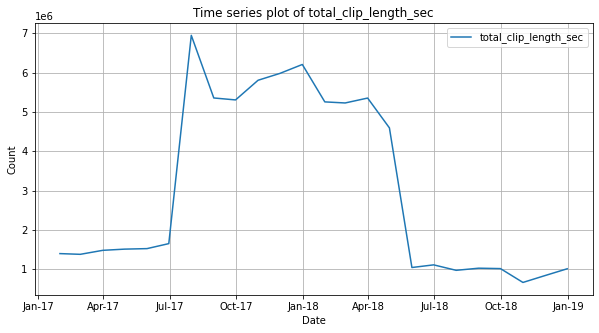

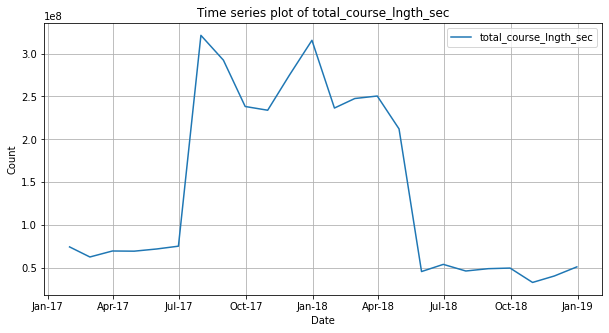

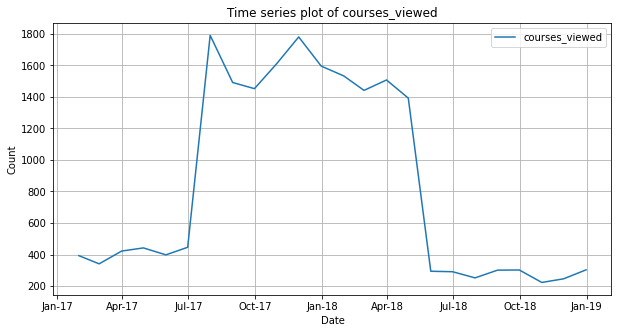

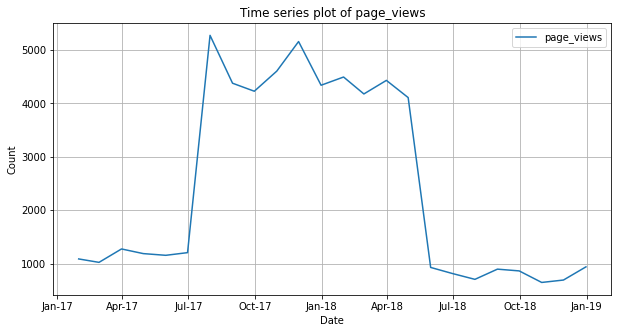

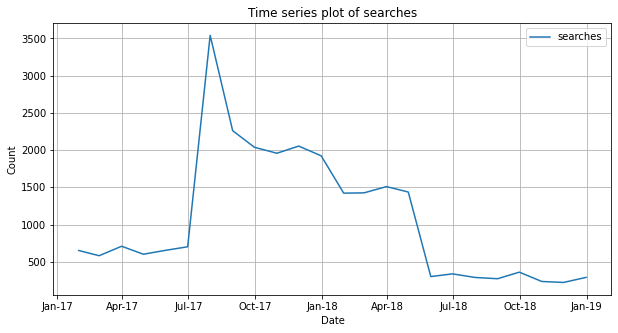

In [19]:
num_cols= ['visits', 'clip_views', 'view_time_sec', 'total_clip_length_sec',
           'total_course_lngth_sec','courses_viewed', 'page_views', 'searches']
for i in num_cols:
    create_ts(i)

### B2C vs B2B visits

In [20]:
temp_df = df1.groupby('visit_dt')['B2C','B2B'].sum('acct_id')
temp_df_month = temp_df.resample('M').sum()

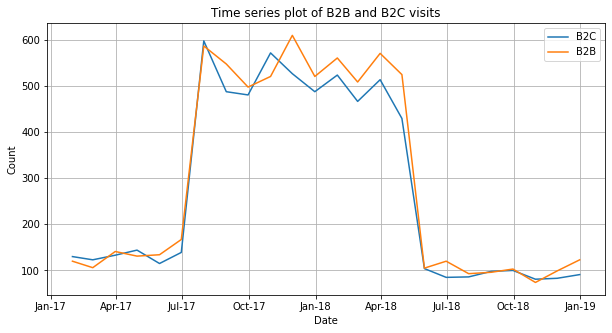

In [21]:
ts_plot_2(y1=temp_df_month.B2C, label1="B2C", y2=temp_df_month.B2B, label2="B2B",
          xlabel="Date", ylabel="Count", title='Time series plot of B2B and B2C visits')

### Old vs New Acc ID visits

In [22]:
unique_list_dt = pd.DataFrame(df1.sort_values('visit_dt').groupby("visit_dt").acct_id.apply(lambda x: list(np.unique(x)))).reset_index()

new_accs = list()
old_accs = list()

a = unique_list_dt.acct_id[0]
for i in range(0,unique_list_dt.shape[0]):
    b = unique_list_dt.acct_id[i]
    c = set(b) - set(a)
    a += list(c)
    new_accs.append(len(c))
    old_accs.append( (len(b) - len(c)))

unique_list_dt["new_accounts"] = new_accs
unique_list_dt["old_accounts"] = old_accs

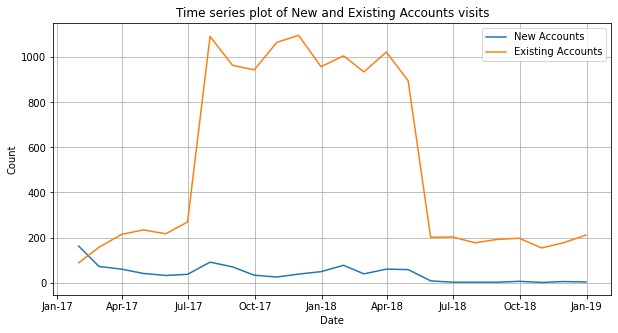

In [23]:
temp_df = unique_list_dt.set_index('visit_dt').drop(columns="acct_id")
temp_df_month = temp_df.resample('M').sum()

ts_plot_2(y1=temp_df_month.new_accounts, label1="New Accounts", y2=temp_df_month.old_accounts,
          label2="Existing Accounts", xlabel="Date", ylabel="Count",
          title='Time series plot of New and Existing Accounts visits')

### CUSTOMER LIFETIME (Time between first and last visit)

In [24]:
temp = pd.DataFrame(df1
                    .sort_values('visit_dt')
                    .groupby('acct_id')
                    .visit_dt
                    .apply(lambda x: round((x.iloc[-1]-x.iloc[0]).days/30, 0))
                    )
temp_df = temp.reset_index().sort_values('visit_dt').groupby('visit_dt').count().reset_index()
temp_df.columns = ["Customer Life Time", "#Customers"]

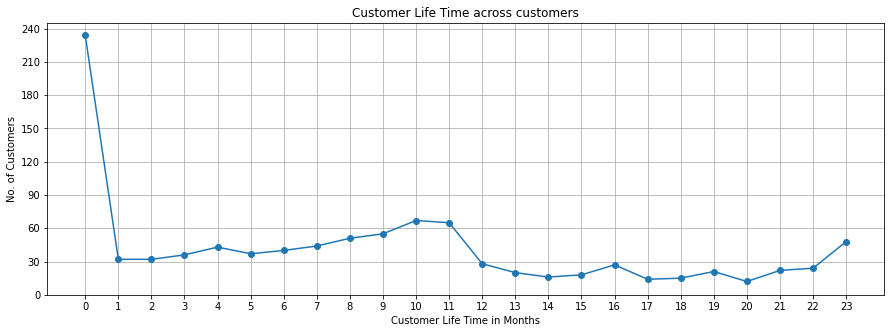

In [25]:
fig, ax = plt.subplots( figsize=(15,5))
ax.plot(temp_df["Customer Life Time"], temp_df["#Customers"], "o-")

ax.set_xlabel("Customer Life Time in Months")
ax.set_ylabel("No. of Customers")

ax.set_title("Customer Life Time across customers")

plt.xticks(np.arange(0, 24, 1))
plt.yticks(np.arange(0, 250, 30))
plt.grid()
plt.show()

### NUMBER OF VISITS BY CUSTOMERS

In [26]:
temp_df = pd.DataFrame(df1.groupby('acct_id').visits.sum()).reset_index()
temp_df_2 = temp_df.groupby('visits').count().reset_index()
temp_df_2.columns = ["#Visits", "#Customers"]

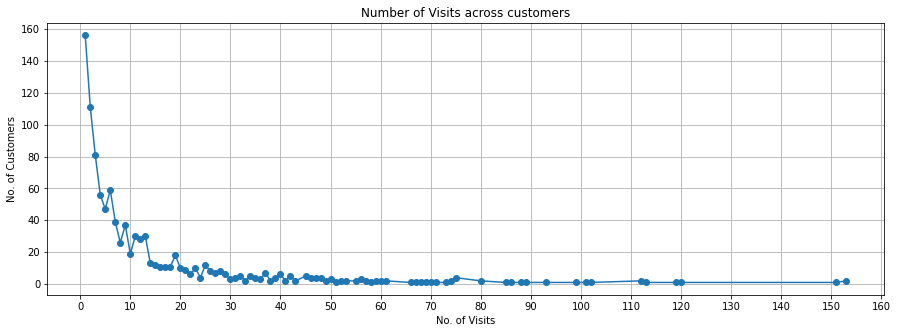

In [27]:
fig, ax = plt.subplots( figsize=(15,5))
ax.plot(temp_df_2["#Visits"], temp_df_2["#Customers"], "o-")

ax.set_xlabel("No. of Visits")
ax.set_ylabel("No. of Customers")

ax.set_title("Number of Visits across customers")

plt.xticks(np.arange(0, 170, 10))
plt.yticks(np.arange(0, 170, 20))
plt.grid()
plt.show()

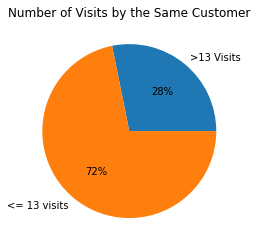

In [28]:
# 13 or fewer visits to the platform
temp_df_2["<=13visits"] = (temp_df_2['#Visits']<=13).astype('int')
temp_df_3 = pd.DataFrame(temp_df_2.groupby("<=13visits")['#Customers'].sum())
plt.pie(temp_df_3['#Customers'], labels=[">13 Visits", "<= 13 visits"], autopct='%1.f%%')
plt.title("Number of Visits by the Same Customer")
plt.show()

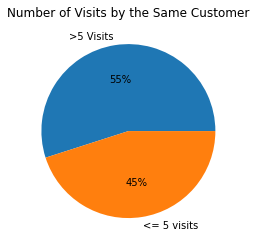

In [29]:
# 5 or fewer visits to the platform
temp_df_2["<=5visits"] = (temp_df_2['#Visits']<=5).astype('int')
temp_df_3 = pd.DataFrame(temp_df_2.groupby("<=5visits")['#Customers'].sum())
plt.pie(temp_df_3['#Customers'], labels=[">5 Visits", "<= 5 visits"], autopct='%1.f%%')
plt.title("Number of Visits by the Same Customer")
plt.show()

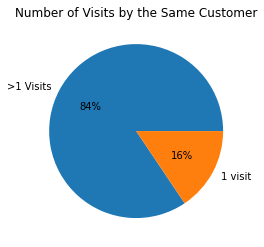

In [30]:
# Only 1 visit to the platform
temp_df_2["1visit"] = (temp_df_2['#Visits']==1).astype('int')
temp_df_3 = pd.DataFrame(temp_df_2.groupby("1visit")['#Customers'].sum())
plt.pie(temp_df_3['#Customers'], labels=[">1 Visits", "1 visit"], autopct='%1.f%%')
plt.title("Number of Visits by the Same Customer")
plt.show()

### PAGE VIEWS

In [31]:
temp_df = pd.DataFrame(df1.groupby('page_views').visits.count())

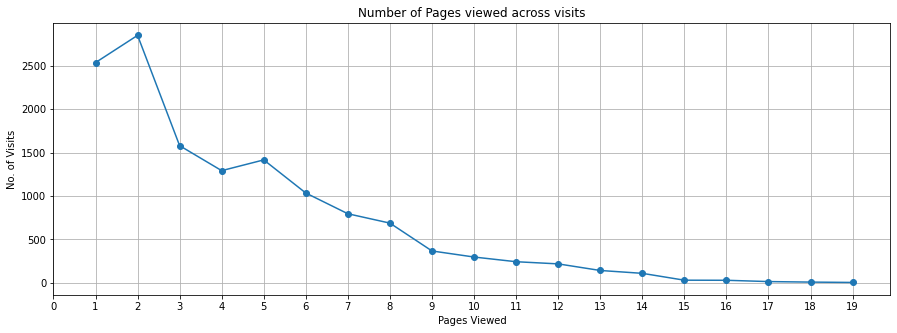

In [32]:
fig, ax = plt.subplots( figsize=(15,5))
ax.plot(temp_df.index, temp_df["visits"], "o-")

ax.set_xlabel("Pages Viewed")
ax.set_ylabel("No. of Visits")

ax.set_title("Number of Pages viewed across visits")
plt.xticks(np.arange(0, 20, 1))
plt.grid()
plt.show()

### COURSES VIEWED

In [33]:
temp_df = pd.DataFrame(df1.groupby('courses_viewed').visits.count())

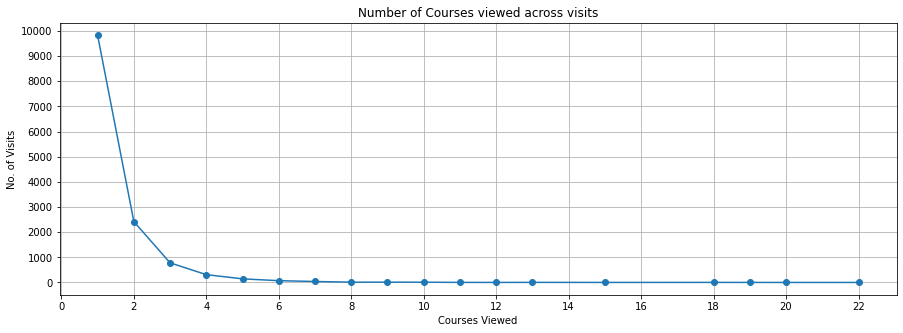

In [34]:
fig, ax = plt.subplots( figsize=(15,5))
ax.plot(temp_df.index, temp_df["visits"], "o-")

ax.set_xlabel("Courses Viewed")
ax.set_ylabel("No. of Visits")

ax.set_title("Number of Courses viewed across visits")
plt.xticks(np.arange(0, 23, 2))
plt.yticks(np.arange(0, 11000, 1000))
plt.grid()
plt.show()


Note: It would be interesting to gather data and find out how many unique courses the customer is watching in total and per visit.

### VIEW TIME

In [35]:
temp_df = df1.groupby('visit_dt')['view_time_sec', 'visits'].sum()
temp_df["avg_view_time"] = round((temp_df.view_time_sec/temp_df.visits)/60, -1)
temp_df_month = temp_df.resample('M').mean()

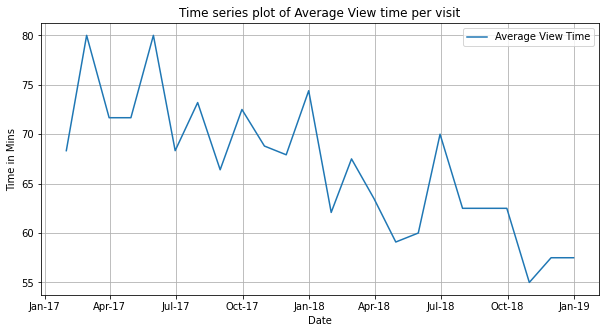

In [36]:
ts_plot(y1=temp_df_month.avg_view_time, label1="Average View Time",
        xlabel="Date", ylabel="Time in Mins",
        title=f'Time series plot of Average View time per visit')

### CLIP VIEWS

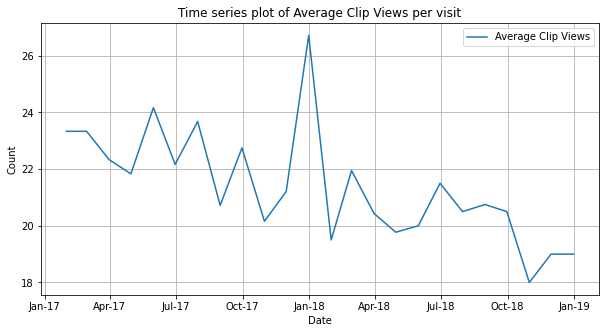

In [37]:
temp_df = df1.groupby('visit_dt')['clip_views', 'visits'].sum()
temp_df["avg_clip_views"] = round((temp_df.clip_views/temp_df.visits), 0)
temp_df_month = temp_df.resample('M').mean()

ts_plot(y1=temp_df_month.avg_clip_views, label1="Average Clip Views",
        xlabel="Date", ylabel="Count",
        title=f'Time series plot of Average Clip Views per visit')

###### Analysing the spike in Jan'18

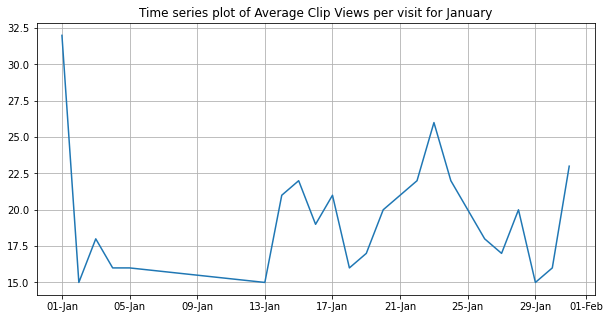

In [38]:
st, ed = dt(2018,1,1), dt(2018,1,31)
jan_data = df1.query("@st<=visit_dt<=@ed")

temp_df = jan_data.groupby('visit_dt')['clip_views', 'visits'].sum()
temp_df["avg_clip_views"] = round((temp_df.clip_views/temp_df.visits), 0)

fig, ax = plt.subplots( figsize=(10,5))
ax.plot(temp_df.avg_clip_views, label="Average Clip Views")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_title("Time series plot of Average Clip Views per visit for January")
plt.grid()
plt.show()

### CUSTOMER LAST DAYS

In [39]:
temp = pd.DataFrame(df1
                    .sort_values('visit_dt')
                    .groupby('acct_id')
                    .visit_dt
                    .apply(lambda x: x.iloc[-1])
                    ).reset_index()

In [40]:
temp_df = temp.groupby('visit_dt').count()
temp_df_month = temp_df.resample('M').mean()

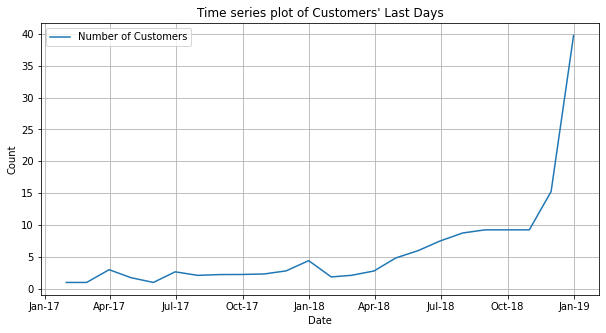

In [41]:
ts_plot(y1=temp_df_month, label1="Number of Customers",
           xlabel="Date", ylabel="Count", title="Time series plot of Customers' Last Days")

### ADDITIONAL ANALYSIS

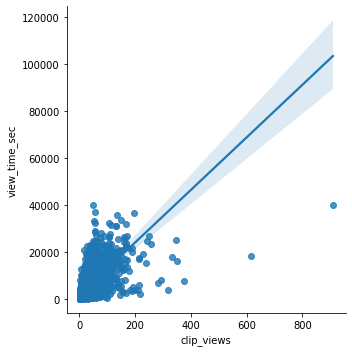

In [42]:
#As view time increases the Clips views Increase
sns.lmplot(x='clip_views',y='view_time_sec', data=df1)

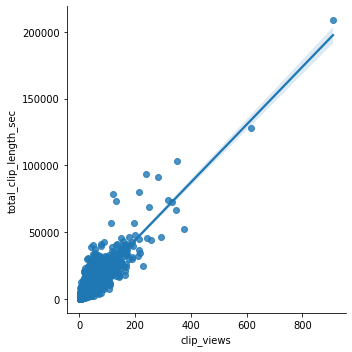

In [43]:
#As expected, as Clip views Increase, total clip length increases
sns.lmplot(x='clip_views',y='total_clip_length_sec', data=df1)

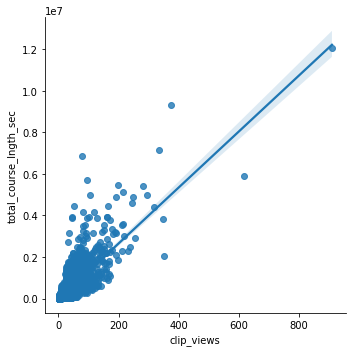

In [44]:
#AS Clip views Increase, total course length increases
sns.lmplot(x='clip_views',y='total_course_lngth_sec', data=df1)

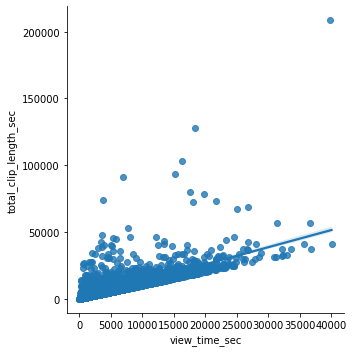

In [45]:
sns.lmplot(x='view_time_sec',y='total_clip_length_sec', data=df1)

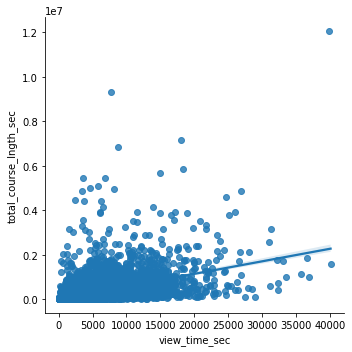

In [46]:
#Eventhough view time is increasing, the total course length is increasing at a slower pace
sns.lmplot(x='view_time_sec',y='total_course_lngth_sec', data=df1)

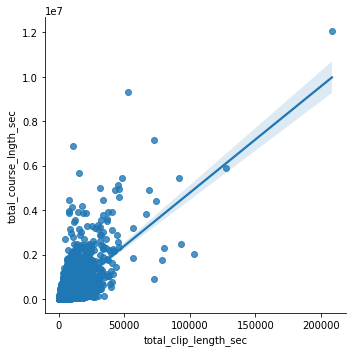

In [47]:
#As expected, the toal clip length increases with increase in total course length.
sns.lmplot(x='total_clip_length_sec',y='total_course_lngth_sec', data=df1)